# Day 9 In-class Assignment: Debugging


### <p style="text-align: right;"> &#9989; Kaitlyn Watson
<p style="text-align: right;"> &#9989; James, Tara, Matt, Carson

<img src="https://previews.123rf.com/images/arcady31/arcady311710/arcady31171000174/88935557-%E3%83%90%E3%82%B0-%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E8%A8%98%E5%8F%B7%E3%81%A7%E3%81%AF%E3%81%AA%E3%81%84%E3%81%A7%E3%81%99%E3%80%82.jpg?fj=1" width=300px>

For this assignment, we will give you a piece of code and you will need to use the tools discussed in the pre-class assignment to get the code working correctly.

# Part 1: Debugging Warmup

Below are several pieces of code that have *something* wrong with them. Write the fixed code in the cell below the buggy code and describe the bugs--I.e., Line number, the error message (if applicable), plain English description, and how you fixed it--in the text cell below that. 

### Reminder: Line numbers play a critical role in debugging. Make sure you have line numbers turned on (Go to *View* and select *Toggle Line Numbers*).

## 1.1: Country GDP

The following bit of code is used to calculate the Per-Capita Gross Domestic Product (GDP) for the top five highest GDP countries. 

We calculate the GDP per-capita by dividing GDP/Population.

In [2]:
import numpy as np

country_name = ["United States", "China", "Japan", "Germany", "India"]
country_population = [3.25e8,1.42e9,1.27e8,8.27e7]
country_gdp = np.array([19.48e12,12.24e12,4.87e12,3.69e12,2.65e12])
country_gdp_per_capita = country_gdp/country_population

for ii in range(len(country_name)):
    print("The per-capita GDP of ", country_name, " is ", country_gdp_per_capita[ii])

ValueError: operands could not be broadcast together with shapes (5,) (4,) 

In [8]:
import numpy as np

country_name = ["United States", "China", "Japan", "Germany", "India"]
country_population = [3.25e8,1.42e9,1.27e8,8.27e7,1.38e9]
country_gdp = np.array([19.48e12,12.24e12,4.87e12,3.69e12,2.65e12])
country_gdp_per_capita = country_gdp/country_population

for ii in range(len(country_name)):
    print("The per-capita GDP of ", country_name[ii], " is ", country_gdp_per_capita[ii])

The per-capita GDP of  United States  is  59938.46153846154
The per-capita GDP of  China  is  8619.718309859154
The per-capita GDP of  Japan  is  38346.45669291339
The per-capita GDP of  Germany  is  44619.10519951632
The per-capita GDP of  India  is  1920.2898550724638


Line 6 is giving us a value error because there are different number of elementss in each list.

## 1.2: Calculating Savings

The following bit of code uses a while loop to calculate the compound interest for someone that starts saving at 18 with an interest rate of 6.5%.

(You can refer back to day 3 or 5 for the information on how to calculate compound interest.)

In [ ]:
money_added = 5000.0 
interest_rate = 0.065
age = 18
end_age = 65
total_savings = []
old_savings = 0

while age < end_age:
    current_savings = old_savings + old_savings*interest_rate + money_added
    total_savings.append(current_savings)
    old_savings = current_savings
    
print(current_savings)

In [13]:
money_added = 5000.0 
interest_rate = 0.065
age = 18
end_age = 65
total_savings = []
old_savings = 0

while age < end_age:
    current_savings = old_savings + old_savings*interest_rate + money_added
    total_savings.append(current_savings)
    old_savings = current_savings
    age+=1
print(current_savings)

1407262.5213157288


First, when running the code, no output appears when we use the print statement. This is because the while loop is running for an infinite about of time. The error was located in line 8

# 2. Debugging Legacy Code

You are working for a firm doing weather consulting. You've recently been hired to help the company with making informational plots and figures. Your current task is to write a piece of code that takes in a dataset and produces a series of plots showing different weather variables over time. However, the firm that provides you with weather data is in Germany, meaning that all of their data are in metric, which your American customers won't understand. Therefore, your code must also convert values from metric to imperial units. The following equations describe the conversion between the different units:

\begin{eqnarray}
\mathrm{Wind~Speed}_{\mathrm{Imp}} &=& 0.6214 \times \mathrm{Wind~Speed}_{\mathrm{Metric}} \\ \\
\mathrm{Length}_{\mathrm{Imp}} &=& 0.03937 \times \mathrm{Length}_{\mathrm{Metric}} \\ \\
\mathrm{Temperature}_{\mathrm{Imp}} &=& \left(\mathrm{Temperature}_{\mathrm{Metric}} \times \frac{9}{5}  \right) + 32
\end{eqnarray}

(The $\mathrm{Length}$ equation can be used for things like precipitation and snowfall)

You've been left some "legacy code"--code that was written by someone else to do some task–that is supposed to read in the data, perform the necessary conversions, and make a nice plot. However, this legacy code isn't working (you were originally hired to replace the person who wrote this code. They weren't doing a very good job.) Your boss thinks there are about ~4 bugs in the code. 

Use the tools from the pre-class assignment to debug this code. Do a write-up for each bug you find (I.e., what line in the code, error code, description, and fix). The code should produce a set of plots showing Average Wind Speed, Precipitation, Snow, and Average Temperature (all in imperial units) spanning from August 1st to December 31st of 2022. As always, you should look at the data before working with it.

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def convert_from_metric(awnd, precip, snow, tavg):
    imp_awnd = awnd*0.6214
    imp_precip = precip*0.03937 
    imp_snow = snow*0.03937
    imp_tavg = (tavg + 32)*(9/5)
    return imp_awnd, imp_precip, imp_snow, imp_tavg 

def read_in_data(fname):
    month, date, awnd, precip, snow, tavg = np.loadtxt(fname, usecols = [0,1,2,3,4,5], unpack=True, skiprows='1', delimiter=',')
    
def plot_data(x_data,y_data,y_labels):
    plt.figure(figsize=(14,10))
    
    for jj in range(len(y_data)):
        plt.subplot(2,2,jj+1) 
        plt.plot(x_data,y_data[jj]) 
        plt.xlabel('Days Past 8/1/2021')
        plt.ylabel(y_labels[jj])
    plt.show()

fname = "Weather_Data_Metric.csv"

month, date, awnd, precip, snow, tavg = read_in_data(fname)
imp_awnd, imp_precip, imp_snow = convert_from_metric(awnd, precip, snow, tavg)
y_data = [imp_awnd, imp_precip, imp_snow, imp_tavg]
x_data = range(len(date))
y_labels = ["Average Wind Speed (MPH)", "Precipitation (Inches)", "Snow (Inches)", "Average Temperature (Fahrenheit)"]
plot_data(x_data,y_data,y_labels)

TypeError: 'str' object cannot be interpreted as an integer

1. Line 13 needs a return function so that all the data can be used in following lines. We simply added a return() of all the data from fname in line 14. 
2. Line 13 also prodiced a Type Error code as there was a string that needed to be an integer. We identified this in the skiprows and changed the string "1" to 1. 
3. The next error is a value error identified in Line 29. There is too much info to extract. In order to fix this code, we added imp_tavg to line 29 and the code was able to run efficiently. 

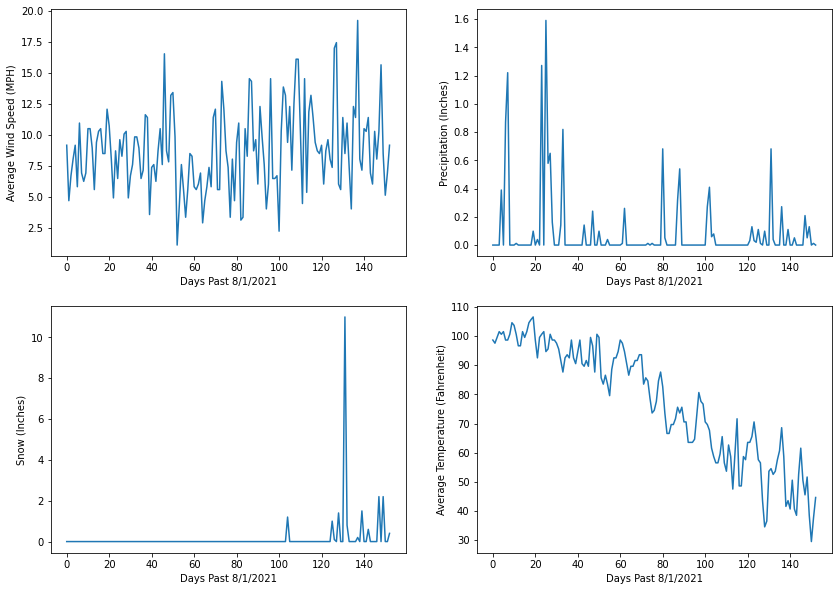

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def convert_from_metric(awnd, precip, snow, tavg):
    imp_awnd = awnd*0.6214
    imp_precip = precip*0.03937 
    imp_snow = snow*0.03937
    imp_tavg = (tavg + 32)*(9/5)
    return imp_awnd, imp_precip, imp_snow, imp_tavg 

def read_in_data(fname):
    month, date, awnd, precip, snow, tavg = np.loadtxt(fname, usecols = [0,1,2,3,4,5], unpack=True, skiprows=1, delimiter=',')
    return(month, date, awnd, precip, snow, tavg)

def plot_data(x_data,y_data,y_labels):
    plt.figure(figsize=(14,10))
    
    for jj in range(len(y_data)):
        plt.subplot(2,2,jj+1) 
        plt.plot(x_data,y_data[jj]) 
        plt.xlabel('Days Past 8/1/2021')
        plt.ylabel(y_labels[jj])
    plt.show()

fname = "Weather_Data_Metric.csv"

month, date, awnd, precip, snow, tavg = read_in_data(fname)
imp_awnd, imp_precip, imp_snow, imp_tavg = convert_from_metric(awnd, precip, snow, tavg)
y_data = [imp_awnd, imp_precip, imp_snow, imp_tavg]
x_data = range(len(date))
y_labels = ["Average Wind Speed (MPH)", "Precipitation (Inches)", "Snow (Inches)", "Average Temperature (Fahrenheit)"]
plot_data(x_data,y_data,y_labels)

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [22]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the appropriate submission folder, and upload it there. Make sure to upload your plot images as well!

If the rest of your group is still working, help them out and show them some of the things you learned!

See you next class!